In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as mtick


In [2]:
cars= pd.read_csv("/Users/tingjue/170 project/cars4.csv",index_col=0)

In [3]:
c = pd.read_csv("/Users/tingjue/Downloads/vehicles.csv")

In [4]:
c = c[['vin','lat','long','state']]

In [5]:
c = c.applymap(lambda s:s.lower() if type(s) == str else s)

In [6]:
t = pd.merge(cars, c, on='vin')

In [7]:
t = t.drop_duplicates(subset='vin', keep="first")

In [8]:
t = t.dropna(axis=0, how='any', thresh=None, 
                   subset=None, 
                   inplace=False).reset_index(drop=True) 

In [61]:
t.groupby('state')

,id,vin,price,year,manufacturer,model,avg_rating,count,condition,cylinders,...,description,lstm_feature,bilstm_feature,gru_feature,cnn_feature,fast_feature,location,lat,long,state
0,0,wvwpf7aj6cw316713,17899,2012.0,volkswagen,golf,4.600694,36.0,excellent,4 cylinders,...,price reduced! -garage kept -low miles (63k)...,18198.558594,27333.046875,22720.089844,23409.597656,21392.708984,salt lake city ut,40.7372,-111.8580,ut
1,4398,wvwdm7aj0cw181950,9891,2012.0,volkswagen,golf,4.600694,36.0,excellent,4 cylinders,...,_volkswagen_golf_energy auto sales --- call us...,16551.052734,16830.625000,15969.620117,13576.520508,15707.687500,wenatchee wa,47.8599,-121.9730,wa
2,23723,wvwdb7ajxcw354699,7995,2012.0,volkswagen,golf,4.600694,36.0,good,5 cylinders,...,2012 volkswagen_ golf_ offered by...,12009.676758,9721.872070,11588.109375,6487.177734,5450.783203,new haven ct,41.5121,-73.0218,ct
3,25205,wvwdm7aj9cw040181,12900,2012.0,volkswagen,golf,4.600694,36.0,excellent,4 cylinders,...,2012 volkswagen golf tdi - (blue graphite meta...,19342.486328,11827.651367,14768.078125,16006.382812,15344.616211,ft myers / sw florida fl,26.1468,-81.7667,fl
4,33832,wvwpf7aj3cw335770,21270,2012.0,volkswagen,golf,4.600694,36.0,excellent,4 cylinders,...,2012 volkswagen golf r 4dr hb w/sunroof & navi...,20155.263672,12482.712891,18049.710938,15435.342773,14372.857422,chicago il,41.9609,-87.7119,il
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59013,82308,wvgpt77l16d064074,9995,2006.0,volkswagen,touareg,4.305556,72.0,good,10 cylinders,...,"'06 vw touareg tdi, 103,964 miles, automatic t...",8014.783691,6944.399414,11832.634766,6348.051270,8534.781250,san antonio tx,29.5227,-98.6387,tx
59014,82426,kmhcg45c23u477668,2200,2003.0,hyundai,accent,4.259615,52.0,good,4 cylinders,...,2003 hyundai accent gl vin: kmhcg45c23u477668 ...,4135.699707,4890.686035,5598.274414,2871.909424,3641.207520,san marcos tx,29.6834,-98.1370,tx
59015,82576,jtezu14r19k025948,12900,2009.0,toyota,4runner,4.357143,7.0,excellent,6 cylinders,...,"clean carfax available. suggested retail $14,6...",14413.969727,12452.664062,10286.337891,12750.390625,11489.996094,tyler / east tx tx,32.7901,-95.4527,tx
59016,82653,yv1vs29501f623797,2000,2001.0,volvo,s40,3.842391,69.0,excellent,4 cylinders,...,2001 volvo s40 1.9 liter turbo charged. 75000 ...,7259.627441,5160.313477,4470.877930,10385.222656,5719.744629,tyler / east tx tx,32.7515,-96.2831,tx


Text(0.5, 1, 'Correlation Heatmap')

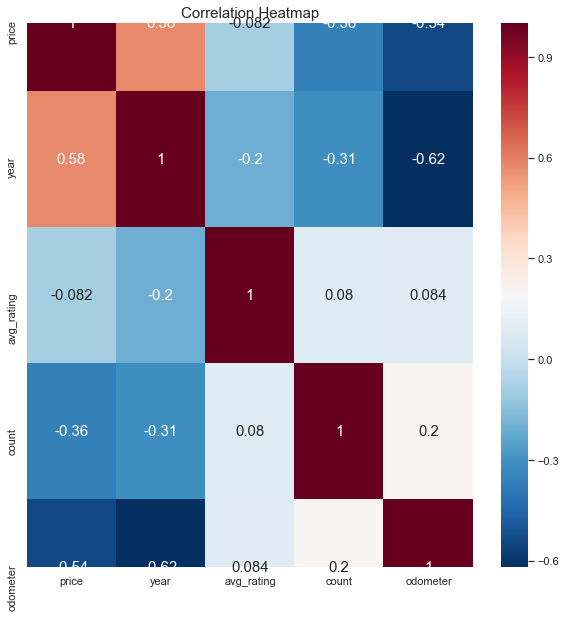

In [77]:
cars= pd.read_csv("/Users/tingjue/170 project/cars4.csv",index_col=0)
cor = cars[['price','year','avg_rating','count','odometer']]
corrMatrix = cor.corr()
#sns.heatmap(corrMatrix, annot=True)
#plt.show()
plt.figure(figsize=(10, 10))
ax = plt.axes()
g =sns.heatmap(corrMatrix, annot=True, ax = ax,cmap = "RdBu_r",annot_kws={"fontsize":15})
sns.set(font_scale=1)
ax.set_title('Correlation Heatmap',fontsize = 15)
plt.show()




Text(0, 0.5, 'Price')

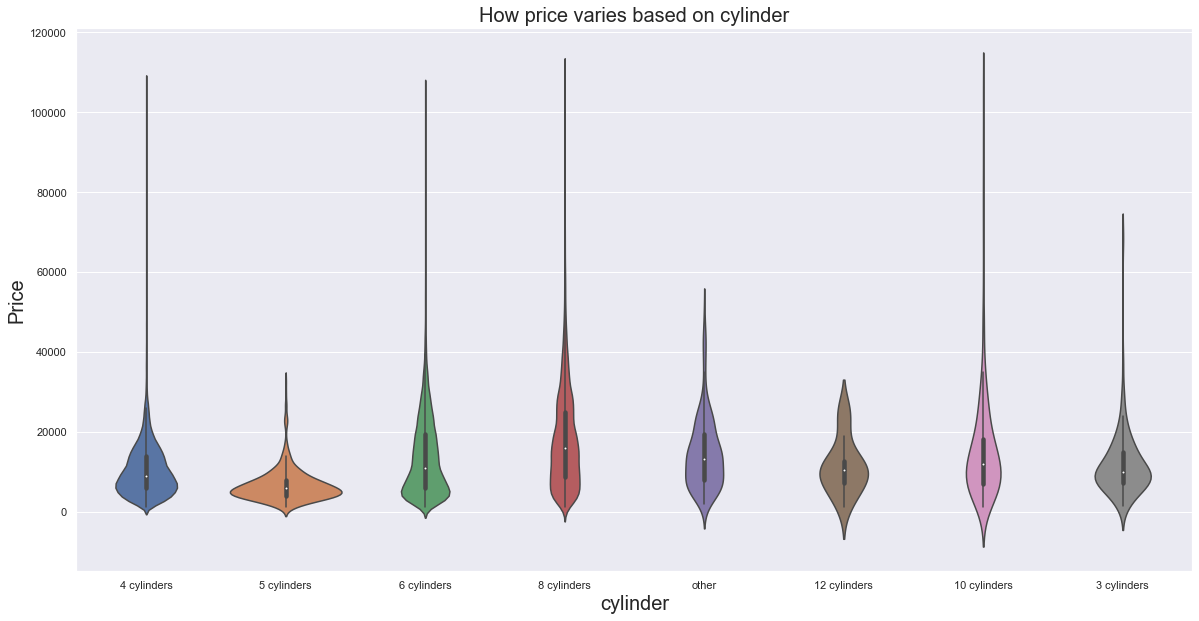

In [133]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x="cylinders", y="price", data=cars)
ax.set_title('How price varies based on cylinder',fontsize = 20)
ax.set_xlabel("cylinder",fontsize=20)
ax.set_ylabel("Price",fontsize=20)

In [84]:
avg = cars[(cars.manufacturer == 'ford')|(cars.manufacturer == 'chevrolet')|(cars.manufacturer == 'toyota')|
          (cars.manufacturer == 'honda')|(cars.manufacturer == 'nissan')]


[Text(0, 0, 'volkswagen'),
 Text(1, 0, 'honda'),
 Text(2, 0, 'subaru'),
 Text(3, 0, 'bmw'),
 Text(4, 0, 'ram'),
 Text(5, 0, 'mercedes_benz'),
 Text(6, 0, 'nissan'),
 Text(7, 0, 'ford'),
 Text(8, 0, 'mitsubishi'),
 Text(9, 0, 'chevrolet'),
 Text(10, 0, 'toyota'),
 Text(11, 0, 'acura'),
 Text(12, 0, 'dodge'),
 Text(13, 0, 'kia'),
 Text(14, 0, 'jeep'),
 Text(15, 0, 'gmc'),
 Text(16, 0, 'hyundai'),
 Text(17, 0, 'pontiac'),
 Text(18, 0, 'lexus'),
 Text(19, 0, 'audi'),
 Text(20, 0, 'mazda'),
 Text(21, 0, 'fiat'),
 Text(22, 0, 'lincoln'),
 Text(23, 0, 'chrysler'),
 Text(24, 0, 'mini'),
 Text(25, 0, 'volvo'),
 Text(26, 0, 'cadillac'),
 Text(27, 0, 'infiniti'),
 Text(28, 0, 'mercury'),
 Text(29, 0, 'buick'),
 Text(30, 0, 'jaguar'),
 Text(31, 0, 'land_rover')]

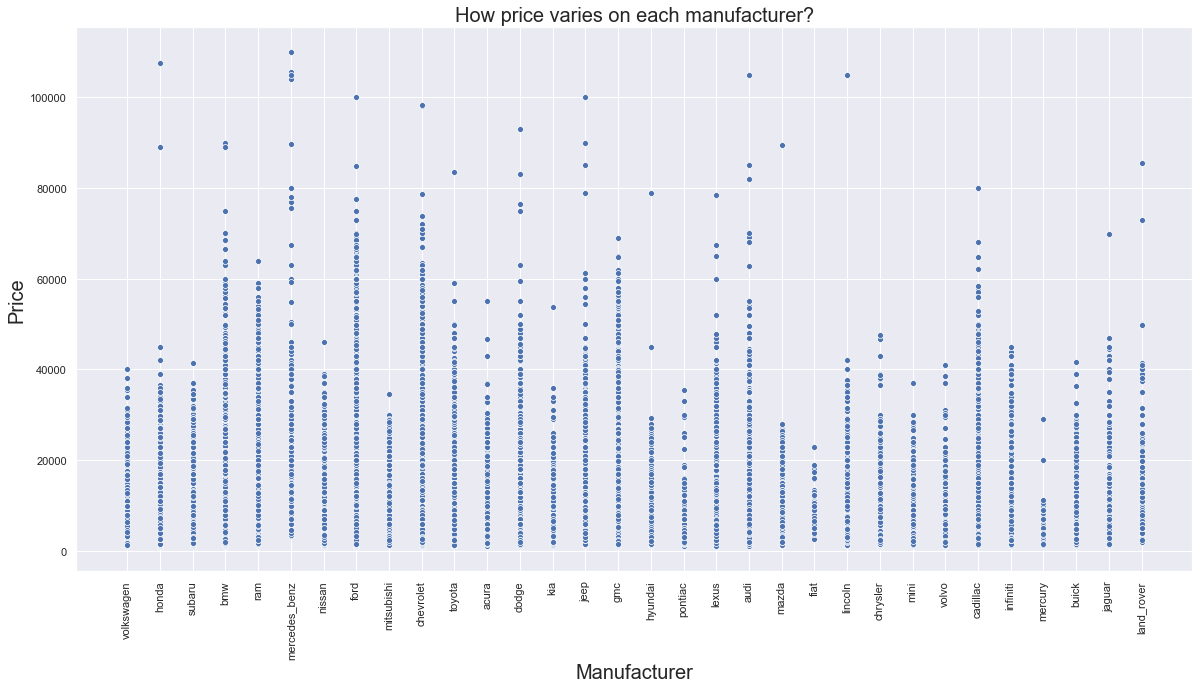

In [107]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
tes = cars[(cars.manufacturer == 'ford')]
b = sns.scatterplot(x="manufacturer", y="price", data=cars) 
plt.draw()
b.set_title('How price varies on each manufacturer?',fontsize = 20)
b.set_xlabel("Manufacturer",fontsize=20)
b.set_ylabel("Price",fontsize=20)
b.set_xticklabels(b.get_xticklabels(),rotation=90)

In [128]:
set(cars['transmission'])

{'automatic', 'manual', 'other'}

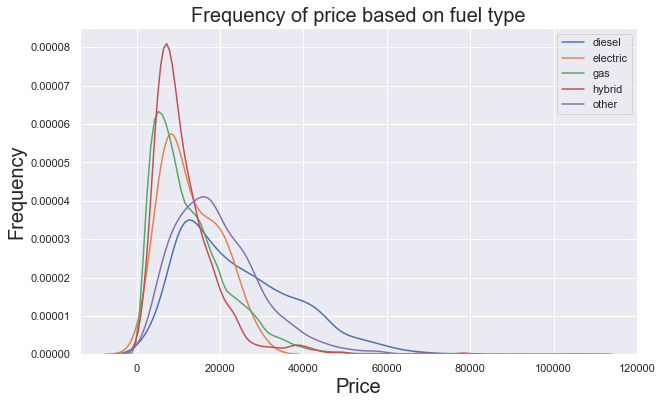

In [125]:
plt.figure(figsize=(10,6))
a = cars.loc[cars['fuel'] == 'diesel']
b = cars.loc[cars['fuel'] == 'electric']
c = cars.loc[cars['fuel'] == 'gas']
d = cars.loc[cars['fuel'] == 'hybrid']
e = cars.loc[cars['fuel'] == 'other']

sns.distplot(a[['price']],hist=False,label='diesel').set_title('Frequency of price based on fuel type',fontsize = 20)
sns.distplot(b[['price']],hist=False,label='electric').set_xlabel("Price",fontsize=20)
sns.distplot(c[['price']],hist=False,label='gas').set_ylabel("Frequency",fontsize=20)
sns.distplot(d[['price']],hist=False,label='hybrid')
sns.distplot(e[['price']],hist=False,label='other')

#b.set_xlabel("Manufacturer",fontsize=20)
#b.set_ylabel("Price",fontsize=20)

Text(0, 0.5, 'Frequency')

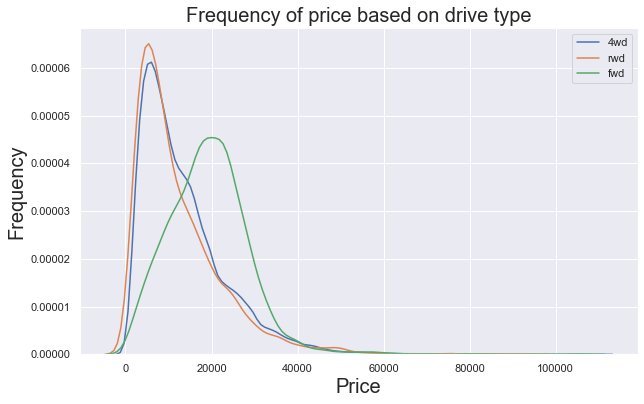

In [129]:
plt.figure(figsize=(10,6))
a = cars.loc[cars['transmission'] == 'automatic']
b = cars.loc[cars['transmission'] == 'manual']
c = cars.loc[cars['transmission'] == 'other']


sns.distplot(a[['price']],hist=False,label='4wd').set_title('Frequency of price based on drive type',fontsize = 20)
sns.distplot(b[['price']],hist=False,label='rwd').set_xlabel("Price",fontsize=20)
sns.distplot(c[['price']],hist=False,label='fwd').set_ylabel("Frequency",fontsize=20)
